In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf
from sqlalchemy import create_engine

from scipy.stats import boxcox
import statsmodels.api as sm

# Display preferences.
%matplotlib inline
sns.set()
pd.options.display.float_format = '{:.3f}'.format

import warnings
warnings.filterwarnings(action="ignore")

# I want to read the full contents of each sentiment
pd.set_option('display.max_colwidth', -1)
pd.options.display.max_columns = None

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'weatherinszeged'

### Functions

In [11]:
def quick_histogram(series,**kwargs):
    title = kwargs.get('title','Plot of series')
    xlabel = kwargs.get('xlabel','X-axis label')
    ylabel = kwargs.get('ylabel','count')
    plt.hist(series)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

## In this exercise, you'll work with historical temperature data from the Szeged, Hungary area. The dataset you'll use is a Postgres database version of this dataset from Kaggle. To complete this assignment, submit a Jupyter notebook containing your solutions to the following tasks:

### First, load the dataset from the weatherinszeged table from Thinkful's database.

In [12]:
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

wx_df = pd.read_sql_query('select * from weatherinszeged',con=engine)

# no need for an open connection, as we're only doing a single query
engine.dispose()

### Build a linear regression model where your target variable is the difference between the apparenttemperature and the temperature. As explanatory variables, use humidity and windspeed. Now, estimate your model using OLS. 

In [13]:
wx_featureset = ['humidity','windspeed']
wx_df['target'] = wx_df['temperature'] - wx_df['apparenttemperature']

In [14]:
wx_df.head(10)

,date,summary,preciptype,temperature,apparenttemperature,humidity,windspeed,windbearing,visibility,loudcover,pressure,dailysummary,target
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472,7.389,0.890,14.120,251.000,15.826,0.000,1015.130,Partly cloudy throughout the day.,2.083
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.356,7.228,0.860,14.265,259.000,15.826,0.000,1015.630,Partly cloudy throughout the day.,2.128
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.378,9.378,0.890,3.928,204.000,14.957,0.000,1015.940,Partly cloudy throughout the day.,0.000
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.289,5.944,0.830,14.104,269.000,15.826,0.000,1016.410,Partly cloudy throughout the day.,2.344
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.756,6.978,0.830,11.045,259.000,15.826,0.000,1016.510,Partly cloudy throughout the day.,1.778
5,2006-04-01 03:00:00+00:00,Partly Cloudy,rain,9.222,7.111,0.850,13.959,258.000,14.957,0.000,1016.660,Partly cloudy throughout the day.,2.111
6,2006-04-01 04:00:00+00:00,Partly Cloudy,rain,7.733,5.522,0.950,12.365,259.000,9.982,0.000,1016.720,Partly cloudy throughout the day.,2.211
7,2006-04-01 05:00:00+00:00,Partly Cloudy,rain,8.772,6.528,0.890,14.152,260.000,9.982,0.000,1016.840,Partly cloudy throughout the day.,2.244
8,2006-04-01 06:00:00+00:00,Partly Cloudy,rain,10.822,10.822,0.820,11.318,259.000,9.982,0.000,1017.370,Partly cloudy throughout the day.,0.000
9,2006-04-01 07:00:00+00:00,Partly Cloudy,rain,13.772,13.772,0.720,12.526,279.000,9.982,0.000,1017.220,Partly cloudy throughout the day.,0.000


### Next, include the interaction of humidity and windspeed to the model above and estimate the model using OLS. Are the coefficients statistically significant? Did the signs of the estimated coefficients for humidity and windspeed change? Interpret the estimated coefficients.

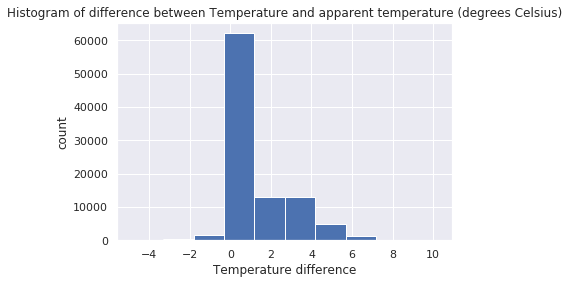

In [15]:
quick_histogram(wx_df['target'],xlabel="Temperature difference",title="Histogram of difference between Temperature and apparent temperature (degrees Celsius)")

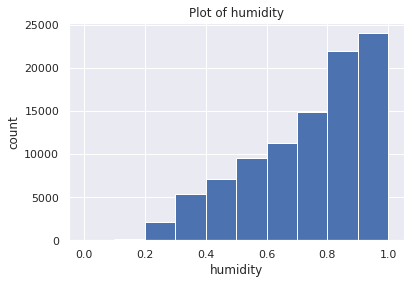

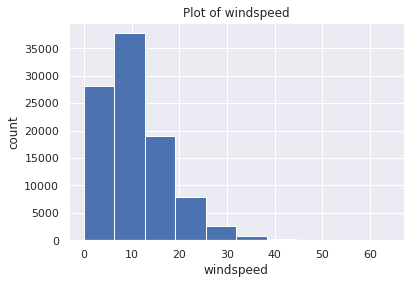

In [16]:
for attribute in wx_featureset:
    quick_histogram(wx_df[attribute],title="Plot of {}".format(attribute),xlabel=attribute)

In [17]:
# Y is the target variable.
# I learned elsewhere that I need to reshape this feature so it is a 2-dimensional matrix.
Y = wx_df['target'].values.reshape(-1,1)

# X is the feature set.
X = wx_df[wx_featureset]

# We create a LinearRegression model object
# from scikit-learn's linear_model module.
lrm = linear_model.LinearRegression()

# fit method estimates the coefficients using OLS
lrm.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [18]:
# We need to manually add a constant
# in statsmodels' sm
Xconst = sm.add_constant(X)

results = sm.OLS(Y, Xconst).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.288
Method:                 Least Squares   F-statistic:                 1.949e+04
Date:                Fri, 26 Jul 2019   Prob (F-statistic):               0.00
Time:                        13:43:46   Log-Likelihood:            -1.7046e+05
No. Observations:               96453   AIC:                         3.409e+05
Df Residuals:                   96450   BIC:                         3.409e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.4381      0.021   -115.948      0.000      -2.479      -2.397
humidity       3.0292      0.024    126.479      0.000       2.982       3.076
windspeed      0.1193      0.001    176.164      0.000       0.118       0.121
==============================================================================
Omnibus:                     3935.747   Durbin-Watson:                   0.267
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4613.311
Skew:                           0.478   Prob(JB):                         0.00
Kurtosis:                       3.484   Cond. No.                         88.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Are the estimated coefficients statistically significant? Are the signs of the estimated coefficients in line with your previous expectations? Interpret the estimated coefficients. What are the relations between the target and the explanatory variables?


Humidity and wind speed are both statistically significant (p-values < 0.000).

The humidity rises an average of 3.0292% for each $1^\circ$ Celsius increase between the actual temp and the apparent temp. It tends to feel a lot warmer when it's humid, so I could see where this may make sense (example: actual temp 30C + high humidity --> apparent temp 32C).

The wind speed increases by an average of .1193 km/h for each $1^\circ$ Celsius increase between the actual temp and the apparent temp. This could make sense--windchill for instance is based on the idea that the air "feels" colder when the wind is blowing harder.

## Next, include the interaction of humidity and windspeed to the model above and estimate the model using OLS. Are the coefficients statistically significant? Did the signs of the estimated coefficients for humidity and windspeed change? Interpret the estimated coefficients.

In [19]:
wx_df['humidity_windspeed'] = wx_df['humidity'] * wx_df['windspeed']
wx_featureset = ['humidity_windspeed','humidity','windspeed']

# Y is the target variable.
Y = wx_df['target'].values.reshape(-1,1)

# X is the feature set.
X = wx_df[wx_featureset]

# We create a LinearRegression model object
# from scikit-learn's linear_model module.
lrm = linear_model.LinearRegression()

# fit method estimates the coefficients using OLS
lrm.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [20]:
# We need to manually add a constant
# in statsmodels' sm
Xconst = sm.add_constant(X)

results = sm.OLS(Y, Xconst).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.341
Model:                            OLS   Adj. R-squared:                  0.341
Method:                 Least Squares   F-statistic:                 1.666e+04
Date:                Fri, 26 Jul 2019   Prob (F-statistic):               0.00
Time:                        13:43:46   Log-Likelihood:            -1.6669e+05
No. Observations:               96453   AIC:                         3.334e+05
Df Residuals:                   96449   BIC:                         3.334e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0839      0.033     -2.511      0.012      -0.149      -0.018
humidity_windspeed     0.2971      0.003     88.470      0.000       0.291       0.304
humidity              -0.1775      0.043     -4.133      0.000      -0.262      -0.093
windspeed             -0.0905      0.002    -36.797      0.000      -0.095      -0.086
==============================================================================
Omnibus:                     4849.937   Durbin-Watson:                   0.265
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9295.404
Skew:                           0.378   Prob(JB):                         0.00
Kurtosis:                       4.320   Cond. No.                         193.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The coefficients are all statistically significant. The signs for both humidity and windspeed flipped with the addition of the interaction between humidity and wind speed to the model.

We're now looking at a .1775% drop in humidity for each each $1^\circ$ Celsius increase between the actual temp and the apparent temp, and a .0905 km/h drop in wind speed for the same. 

For the interaction between humidity and windspeed, we can think of it as the effect of humidity on windspeed, and that effect is positive--the effect of humidity will be higher for higher values of windspeed.